# Загрузка датасетов + первый взгляд

In [1]:
!mkdir data
!wget http://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem9/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

--2021-04-12 15:21:22--  http://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem9/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem9/zhestov.ea%40phystech.edu.csv [following]
--2021-04-12 15:21:22--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem9/zhestov.ea%40phystech.edu.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2501 (2.4K) [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>]   2.44K  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from matplotlib.pyplot import figure
from numpy import transpose
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Так делать нам разрешил Радослав, но обычно, кажется, не стоит

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('data/zhestov.ea@phystech.edu.csv', header=None)
data.describe()

,0
count,100.000000
mean,10.146884
std,5.982650
min,-0.074429
25%,4.854266
50%,10.014238
75%,14.767207
max,20.683145


In [6]:
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})

Посмотрим на график значений в TimeSeries

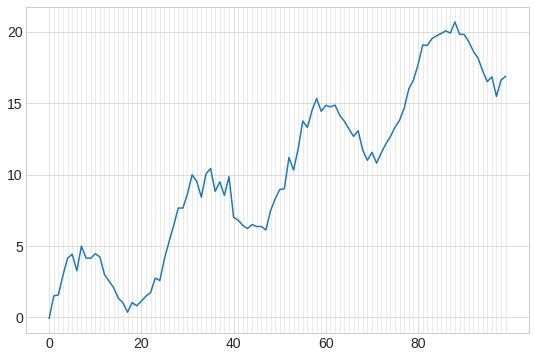

In [7]:
fig = figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(data.index, data.values[:,0])
x_minor = np.arange(0, len(data), 1)
x_major = np.arange(0, len(data), 20)
x_minor = np.setdiff1d(x_minor, x_major)

ax.set_xticks(x_major)
ax.set_xticks(x_minor, minor=True)
ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.8)

plt.show()

# Задание

## Вопрос 1
Найдите период временного ряда


Тут я использую $T=26$, потому что ниже я сделал скрипт для перебора периодов и выбрал тот, для которого `decomposition` ближе всего к линейке.

**ВАЖНО!!!**\
Андрей сказал, что период там точно не больше 20ти, я ему в личку сейчас пытаюсь доказать, что у меня явно период 26, но он ушёл в афк, поэтому пока выложу как есть, ибо сверяться всё-таки с кем-то надо.

В общем, периодическая зависимость может быть формально определена как корреляционная зависимость порядка $k$ между каждым $i$-м элементом ряда и ($i-k$)-м элементом. Ее можно измерить с помощью автокорреляции (т.е. корреляции между самими членами ряда); $k$ обычно называют лагом (иногда используют эквивалентные термины: сдвиг, запаздывание). Если ошибка измерения не слишком большая, то сезонность можно определить визуально, рассматривая поведение членов ряда через каждые $k$ временных единиц.

**sum up:** если я правильно нашёл период, то график остатков будет непериодичен и скорее всего будет удовлетворять предпосылкам Г-М.


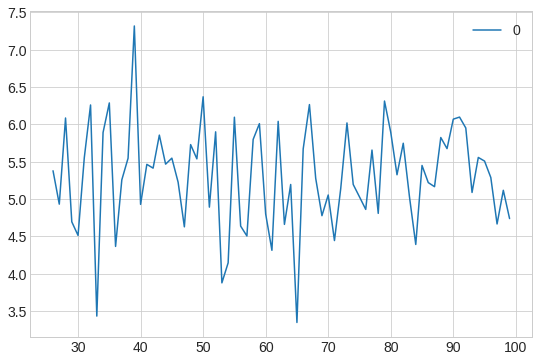

In [22]:
data.diff(periods=26).plot()
plt.show()

<Figure size 3200x1800 with 0 Axes>

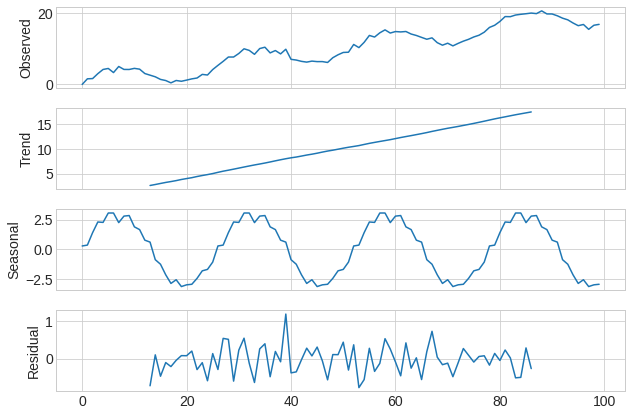

In [23]:
figure(figsize=(16, 9), dpi=200)
stl_data = seasonal_decompose(data, freq=26)
_ = stl_data.plot()
plt.show()

При правильном подборе периода trend будет прямой линией. Давайте переберём значения периода и посмотрим на тренд. Сначала я честно пытался перебрать от 10 до 20, но выглядело как дичь (да и по графику это очевидная дичь), поэтому перебирал дальше.

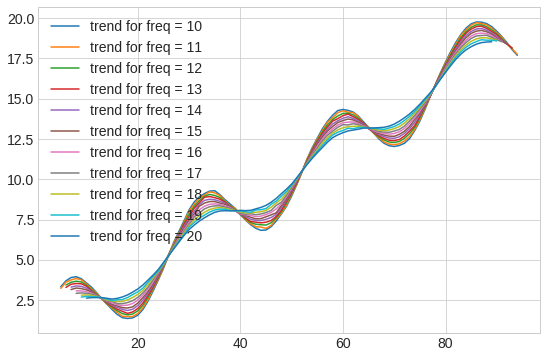

In [10]:
for i in range(10, 21):
    plt.plot(seasonal_decompose(data, freq=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

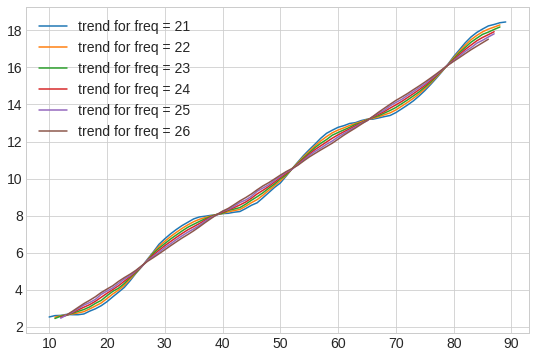

In [11]:
for i in range(21, 27):
    plt.plot(seasonal_decompose(data, freq=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

Похоже на то, что наш период входит в эти значения. Посмотрим внимательней.

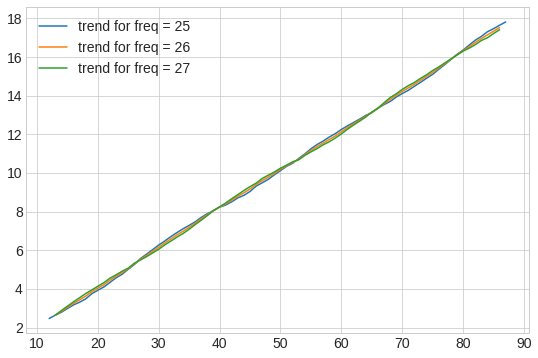

In [12]:
for i in range(25, 28):
    plt.plot(seasonal_decompose(data, freq=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

Следующая итерация: посмотрим на $i=26$ и $i=27$

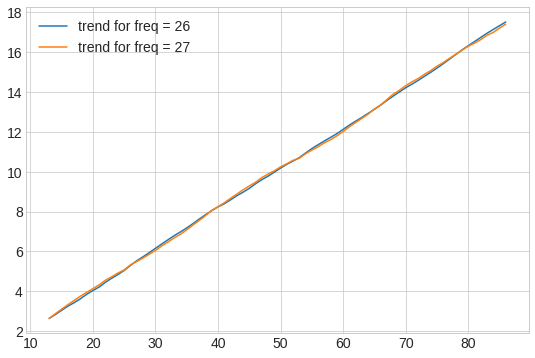

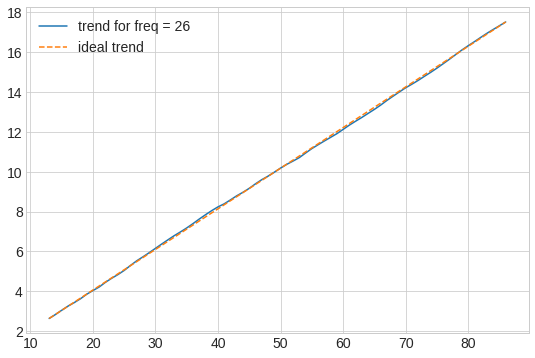

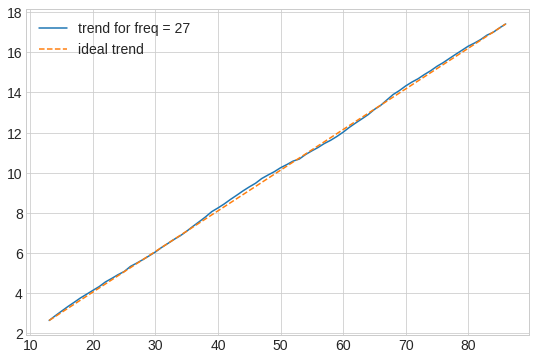

In [13]:
for i in range(26, 28):
    plt.plot(seasonal_decompose(data, freq=i).trend, label=f"trend for freq = {i}")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, freq=26).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 26")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

decomp = seasonal_decompose(data, freq=27).trend.dropna()
plt.plot(decomp, label=f"trend for freq = 27")
plt.plot((decomp.index.min(), decomp.index.max()), (decomp.min(), decomp.max()), '--', label="ideal trend")
plt.legend()
plt.show()

Чисто по графичкам 26 мне нравится больше.\
Есть ещё вариант посмотреть на максимальное изменение производной KPSS статистики, но вряд ли это дофига репрезентативная штука

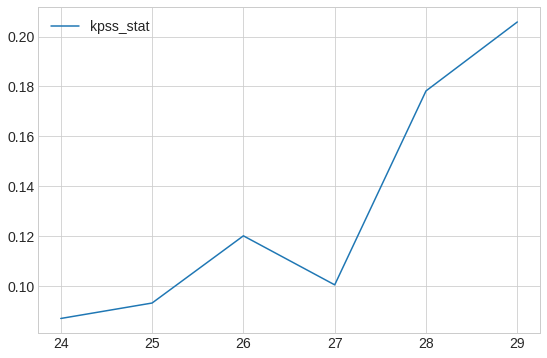

In [16]:
kpss_s = []

for i in range(24, 30):
    stl_data = seasonal_decompose(data[0], freq=i)
    r = stl_data.resid.dropna()
    kpss_s.append((i, kpss(r, lags='legacy')[0]))
kpss_s = transpose(kpss_s)
plt.plot(kpss_s[0], kpss_s[1], label='kpss_stat')
plt.legend()
plt.show()

Короче, возьму период 26, потому что на глаз так правильней.

## Вопрос 2
Значение статистики KPSS для остатков в разложение seaconal_decompose где период указан с предыдущего пункта.

In [24]:
stl_data = seasonal_decompose(data[0], freq=26)
kpss(stl_data.resid.dropna(), lags='legacy')

(0.12015497486856389,
 0.1,
 12,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

0.12015497486856389

In [32]:
print(f"kpss: {kpss(stl_data.resid.dropna(), lags='legacy')[0]:.3}")

kpss: 0.12


## Бонус

Автокорреляционная коррелограмма. Сезонные составляющие временного ряда могут быть найдены с помощью коррелограммы. Коррелограмма (автокоррелограмма) показывает численно и графически автокорреляционную функцию (AКФ), иными словами коэффициенты автокорреляции (и их стандартные ошибки) для последовательности лагов из определенного диапазона.

**sum up:** всё в пределах затенённой области входит в 95% CI для автокорреляции. Лаги посчитаны kpss, можете глянуть в документацию.

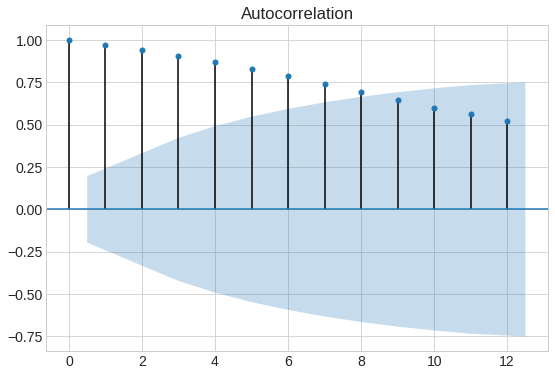

In [21]:
plot_acf(data.values, lags=12)
plt.show()